In [239]:
import midynet
from midynet.utility import display
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pathlib
import numpy as np
import fractions


display.setup_dir("./")

paths_to_figures = [".", "../../../../papers/p-midynet/paper1-mutual_info/figures"]
paths_to_figures = list(map(pathlib.Path, paths_to_figures))

# path_to_data = pathlib.Path(f"/home/charles_murphy/Documents/ulaval/doctorat/projects/local-data/midynet-data/figure2/")
path_to_data = pathlib.Path(f"/home/charles_murphy/Documents/ulaval/doctorat/projects/data/midynet-data/duality/figure2/")


## Loading data from experiment

In [272]:


exp = {}
bit_ratio = np.log(2)
hg, hg_past, hx, hx_past, mi, mi_past = {}, {}, {}, {}, {}, {}

all_dynamics = ["glauber", "sis", "cowan"]
for dynamics in all_dynamics:
    name = f"exact-{dynamics}"
    if (path_to_data / name / "config.pickle").exists():
        exp[dynamics] = midynet.Experiment.load_from_file(path_to_data / name / "config.pickle")
        data = exp[dynamics].metrics["recon_information"].data[exp[dynamics].name]
        hg[dynamics] = midynet.Statistics(data, name="prior")
        hg_past[dynamics] = midynet.Statistics(data, name="posterior_past")
        hx[dynamics] = midynet.Statistics(data, name="evidence")
        hx_past[dynamics] = midynet.Statistics(data, name="evidence_past")
        mi[dynamics] = midynet.Statistics(data, name="mutualinfo")
        mi_past[dynamics] = midynet.Statistics(data, name="mutualinfo") - midynet.Statistics(data, name="mutualinfo_past")

xlabel = r"Number of time steps"
titles = {"glauber": r"Glauber", "sis": r"SIS", "cowan": r"Cowan"}
coupling_labels = {"glauber": r"J", "sis": r"\lambda", "cowan": r"\nu"}
coupling_names = {"glauber": "coupling", "sis": r"infection_prob", "cowan": r"nu"}

In [241]:

print(exp["glauber"].config.data_model.past_length)
print(mi["glauber"][:, 0, 0]["mid"], mi_past["glauber"][:, 0, 0]["mid"])
print(mi["glauber"][:, 0, 1]["mid"], mi_past["glauber"][:, 0, 1]["mid"])
print(mi["glauber"][:, 0, 2]["mid"], mi_past["glauber"][:, 0, 2]["mid"])


[-5, 0, 0.5]
[1.67752179 1.9065984  2.03259189 2.15624198 2.3321088  2.40408092
 2.49451458 2.69199171 2.71755534 3.11029199 3.20883332 3.48087521
 3.5362827  3.82630279 3.97947332 4.20029145 4.28800559 4.56985623
 4.68001839 5.01758194 5.21048214 5.33011319 5.58163496 5.82032631
 6.05332857 6.21205141 6.36021651 6.57637943 6.6920059  7.04760166
 7.07409765 7.24407804 7.34016667 7.47443698 7.55823114 7.64824762
 7.69102776 7.76718111 7.83458727 7.84916833 7.9103115  7.9089399
 7.93167907 7.9663017  7.96534733 7.96980494 7.97408832 7.97629676
 7.974721   7.97721297 7.97297731 7.97714563 7.97727901 7.97720906
 7.97727983 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992
 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992
 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992
 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992
 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992 7.97727992
 7.97727992 7.97727992 7.97727992 7.97727992 7.977

## Figure 2 revisited

/home/charles_murphy/Documents/ulaval/doctorat/projects/codes/midynet/midynet/statistics.py:115: RuntimeWarning: invalid value encountered in true_divide
  data["mid"] /= other.__data__["mid"]
/home/charles_murphy/Documents/ulaval/doctorat/projects/codes/midynet/midynet/statistics.py:115: RuntimeWarning: invalid value encountered in true_divide
  data["mid"] /= other.__data__["mid"]
/home/charles_murphy/Documents/ulaval/doctorat/projects/codes/midynet/midynet/statistics.py:115: RuntimeWarning: invalid value encountered in true_divide
  data["mid"] /= other.__data__["mid"]


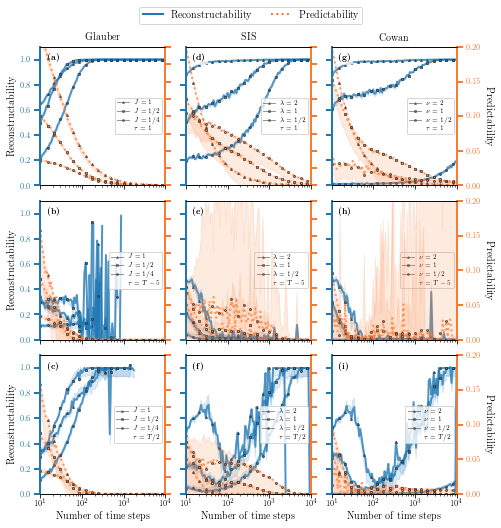

In [290]:
fig, ax = plt.subplots(3, 3, figsize=(7, 7), sharex=True, sharey=False)

ax = {dynamics: ax[:,i] for i, dynamics in enumerate(all_dynamics)}
axx = {dynamics: [_ax.twinx() for _ax in ax[dynamics]] for i, dynamics in enumerate(all_dynamics)}
# for dynamics in all_dynamics:
#     for i, _ax in enumerate(ax[dynamics]):
#         _ax.get_shared_y_axes().join(_ax, axx[dynamics][i])
    


recon_color = display.med_colors["blue"]
pred_color = display.dark_colors["orange"]


spacing = 7
min_index = 5
recon_yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
pred_yticks = [0, 0.05, 0.1, 0.15, 0.2]

markers = ["o", "s", "^", "*"]
for dynamics_id, dynamics in enumerate(all_dynamics):
    if dynamics not in exp:
        continue
    x = np.array(exp[dynamics].config.data_model.length)
    m_indices = list(range(min_index)) + list(range(min_index, len(x), spacing))
    coupling = exp[dynamics].config.data_model.get_value(coupling_names[dynamics])
    tau = exp[dynamics].config.data_model.get_value("past_length")
    if dynamics == "sis":
        coupling = [c / exp[dynamics].config.data_model.recovery_prob for c in coupling]
    alpha = np.linspace(0, 1, len(coupling) + 2)[2:] ** 1.5
    recon = mi_past[dynamics] / hg_past[dynamics]
    pred = mi_past[dynamics] / (hx[dynamics] - hx_past[dynamics])
    tau = [0, -5, 0.5]
    tau_indices = [1, 0, 2]
    for i, (t_index, t) in enumerate(zip(tau_indices, tau)):
        for c_index, (c, a) in reversed(list(enumerate(zip(coupling, alpha)))):
            y = recon if len(coupling) == 1 else recon[:, c_index, t_index]
            display.plot_statistics(
                x, y,
                ax=ax[dynamics][i], 
                color=recon_color,
                alpha=0.75,
                linestyle="-",
                marker=markers[c_index],
                linewidth=2,
                markersize=2,
                markeredgecolor=display.dark_colors["grey"],
                bar=False,
                spacing=5,
            )
#             y = recon[m_indices] if len(coupling) == 1 else recon[m_indices, c_index, t_index]
#             display.plot_statistics(
#                 x[m_indices], y,
#                 ax=ax[dynamics][i], 
#                 color=recon_color,
#                 alpha=0.75,
#                 linestyle="None",
#                 marker=markers[c_index],
#                 markersize=2,
#                 markeredgecolor=display.dark_colors["grey"],
#                 bar=False,
#             )


            y = pred if len(coupling) == 1 else pred[:, c_index, t_index]
            display.plot_statistics(
                x, y,
                ax=axx[dynamics][i], 
                color=pred_color,
                alpha=0.75,
                linestyle="dotted",
                linewidth=2,
                marker=markers[c_index],
                markeredgecolor=display.dark_colors["grey"],
                markersize=2,
                bar=False,
                spacing=5,
            )
#             y = pred[m_indices] if len(coupling) == 1 else pred[m_indices, c_index, t_index]
#             display.plot_statistics(
#                 x[m_indices], y,
#                 ax=axx[dynamics][i], 
#                 color=pred_color,
#                 alpha=0.75,
#                 linestyle="None",
#                 marker=markers[c_index],
#                 markersize=2,
#                 markeredgecolor=display.dark_colors["grey"],
#                 bar=False,
#             )
        ax[dynamics][i].set_xscale("log")
        axx[dynamics][i].set_xscale("log")
#             axx[dynamics][i].set_ylim([0, axx[dynamics][i].get_ylim()[-1]])
    
        if dynamics_id == 0:
            ax[dynamics][i].set_ylabel(r"Reconstructability", fontsize=display.fontsizes["large"])
            ax[dynamics][i].set_yticks(recon_yticks)
        #         ax[dynamics].set_yticklabels([fractions.Fraction(x).limit_denominator() for x in recon_yticks])
        
        if dynamics_id == len(all_dynamics)-1:
            axx[dynamics][i].set_ylabel(r"Predictability", fontsize=display.fontsizes["large"], rotation=-90, rotation_mode="anchor", va="bottom")
            axx[dynamics][i].set_yticks(pred_yticks)
        #         axx[dynamics].set_yticklabels([fractions.Fraction(x).limit_denominator() for x in pred_yticks])
        if i == 2:
            ax[dynamics][i].set_xlabel(xlabel, fontsize=display.fontsizes["large"])
        ax[dynamics][i].tick_params(axis='both', labelsize=display.fontsizes["medium"])

        ax[dynamics][i].set_ylim([0, 1.1])
        ax[dynamics][i].set_xlim([1e1, 1e4])
        axx[dynamics][i].set_ylim([0, 0.2])
        if dynamics_id != 0:
            ax[dynamics][i].set_yticklabels([])
        if dynamics_id != 2:
            axx[dynamics][i].set_yticklabels([])
#     ax[dynamics].set_xlim([1, 1000])
#     ax[dynamics].set_ylim([0., 1.])
#     ax[dynamics].set_xscale("log")
    
#     axx[dynamics].set_xlabel(xlabel, fontsize=display.fontsizes["large"])
#     axx[dynamics].tick_params(axis='both', labelsize=display.fontsizes["medium"])
#     axx[dynamics].set_xlim([1, 1e4])
#     axx[dynamics].set_xscale("log")
#     axx[dynamics].set_ylim([0, 0.5])
    
        axx[dynamics][i].spines['left'].set_color(recon_color)
        axx[dynamics][i].spines['left'].set_linewidth(2)
        axx[dynamics][i].spines['right'].set_color(pred_color)
        axx[dynamics][i].spines['right'].set_linewidth(2)
        axx[dynamics][i].tick_params(axis='y', colors=pred_color, length=6, width=2)
        
        if t == 0:
            t_label = "1"
        elif t < 0:
            t_label = f"T - {abs(t)}"
        elif isinstance(t, float):
            t_fraction = fractions.Fraction(t)
            if t_fraction.numerator == 1:
                t_label = f"T / {t_fraction.denominator}"
            else:
                t_label = f"{t_fraction.numerator} T / {t_fraction.denominator}"
        handles = [
            Line2D(
                [0], [0], 
                marker="None", 
                linestyle="None", 
                color="k", 
                label=rf"$\tau = {t_label}$", 
                alpha=0.5,
                markersize=2,
                linewidth=1,
            )
        
        handles = [
            Line2D(
                [0], [0], 
                marker=markers[k], 
                linestyle="-", 
                color=display.dark_colors["grey"], 
                label=rf"${coupling_labels[dynamics]} = {fractions.Fraction(c)}$", 
                alpha=0.5,
                markersize=2,
                linewidth=1,
            )
            for k, c in reversed(list(enumerate(coupling)))
        ]
        ax[dynamics][i].legend(handles=handles, loc="center right", fontsize=display.fontsizes["small"], ncol=1, frameon=True)
        ax[dynamics][i].tick_params(axis='y', colors=recon_color, length=6, width=2)
        
    ax[dynamics][0].set_title(titles[dynamics], fontsize=display.fontsizes["large"])
            
for dynamics in all_dynamics:
    for i in range(3):
        display.Label.plot(ax[dynamics][i], loc="top left", fontsize=display.fontsizes["medium"], box=True)
display.Label.clear()

handles = [Line2D([0], [0], marker="None", linestyle="-", color=recon_color, label=r"Reconstructability", alpha=1, lw=2, ms=2)]
handles += [Line2D([0], [0], marker="None", linestyle="dotted", color=pred_color, label=r"Predictability", alpha=1, lw=2, ms=2)]
lg = fig.legend(handles=handles, loc="center", fontsize=display.fontsizes["large"], ncol=2, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
# plt.subplots_adjust(wspace=0.15)

# for p in paths_to_figures:
#     fig.savefig(p / "svg/p1-figure2.svg", bbox_extra_artists=(lg,), bbox_inches='tight')
#     fig.savefig(p / "pdf/p1-figure2.pdf", bbox_extra_artists=(lg,), bbox_inches='tight')
#     fig.savefig(p / "png/p1-figure2.png", bbox_extra_artists=(lg,), bbox_inches='tight')

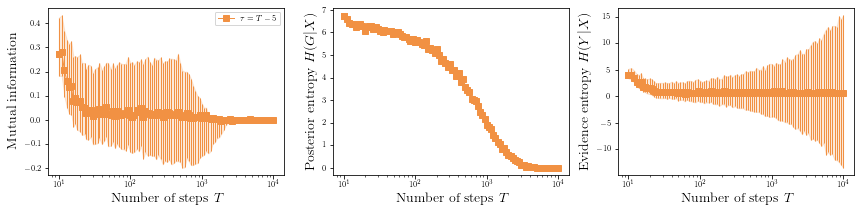

In [251]:
# plt.plot(exp["glauber"][:, 1, 0]
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
dynamics = "sis"
c_index = 0

T = exp[dynamics].config.data_model.length
# display.plot_statistics(T, mi_past[dynamics][:, c_index, 1], ax=ax[0], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
display.plot_statistics(T, mi_past[dynamics][:, c_index, 0], ax=ax[0], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, mi_past[dynamics][:, c_index, 2], ax=ax[0], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
ax[0].legend()
ax[0].set_xlabel(r"Number of steps $T$", fontsize=14)
ax[0].set_ylabel(r"Mutual information", fontsize=14)
ax[0].set_xscale("log")

# display.plot_statistics(T, hg_past[dynamics][:, c_index, 1], ax=ax[1], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
display.plot_statistics(T, hg_past[dynamics][:, c_index, 0], ax=ax[1], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, hg_past[dynamics][:, c_index, 2], ax=ax[1], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
ax[1].set_xlabel(r"Number of steps $T$", fontsize=14)
ax[1].set_ylabel(r"Posterior entropy $H(G|X)$", fontsize=14)
ax[1].set_xscale("log")

evidence_entropy = hx[dynamics] - hx_past[dynamics]
# display.plot_statistics(T, evidence_entropy[:, c_index, 1], ax=ax[2], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
display.plot_statistics(T, evidence_entropy[:, c_index, 0], ax=ax[2], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, evidence_entropy[:, c_index, 2], ax=ax[2], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
ax[2].set_xlabel(r"Number of steps $T$", fontsize=14)
ax[2].set_ylabel(r"Evidence entropy $H(Y|X)$", fontsize=14)
ax[2].set_xscale("log")

fig.tight_layout()

# ax[0].plot(T, hg_past["glauber"][:, 1, 0]["mid"])
# ax[0].plot(T, hg_past["glauber"][:, 1, 1]["mid"])
# ax[0].plot(T, hg_past["glauber"][:, 1, 2]["mid"])
# ax[0].legend()
# ax[0].xlabel(r"Number of steps $T$", fontsize=14)
# ax[0].ylabel(r"Mutual information", fontsize=14)



/home/charles_murphy/Documents/ulaval/doctorat/projects/codes/midynet/midynet/statistics.py:115: RuntimeWarning: invalid value encountered in true_divide
  data["mid"] /= other.__data__["mid"]


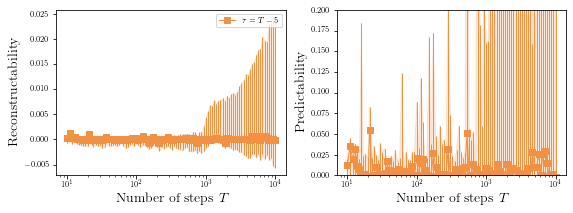

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
T = exp[dynamics].config.data_model.length
recon = mi_past[dynamics] / hg_past[dynamics]
# display.plot_statistics(T, recon[:, c_index, 1], ax=ax[0], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
display.plot_statistics(T, recon[:, c_index, 0], ax=ax[0], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, recon[:, c_index, 2], ax=ax[0], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
ax[0].legend()
ax[0].set_xlabel(r"Number of steps $T$", fontsize=14)
ax[0].set_ylabel(r"Reconstructability", fontsize=14)
ax[0].set_xscale("log")

pred = mi_past[dynamics] / (hx[dynamics] - hx_past[dynamics])
# display.plot_statistics(T, pred[:, c_index, 1], ax=ax[1], label=r"$\tau=1$", color=display.med_colors["red"], marker="o")
display.plot_statistics(T, pred[:, c_index, 0], ax=ax[1], label=r"$\tau=T - 5$", color=display.med_colors["orange"], marker="s")
# display.plot_statistics(T, pred[:, c_index, 2], ax=ax[1], label=r"$\tau=T / 2$", color=display.med_colors["blue"], marker="v")
ax[1].set_xlabel(r"Number of steps $T$", fontsize=14)
ax[1].set_ylabel(r"Predictability", fontsize=14)
ax[1].set_ylim([0, 0.2])
ax[1].set_xscale("log")

fig.tight_layout()


In [252]:
evidence_entropy[:, 0, 0]

{'mid': array([4.04486498, 4.02061965, 3.44678805, 2.76761138, 2.39480846,
        2.69344599, 1.76018134, 1.73532001, 1.48532315, 1.51500306,
        1.331139  , 0.99523749, 0.80869379, 0.76867628, 0.72771092,
        0.77022888, 0.86550112, 0.71846973, 0.84772915, 0.78955351,
        0.74702673, 0.87557347, 0.54141463, 0.62070874, 0.72483654,
        0.42309249, 0.84597908, 0.7079185 , 0.65980716, 0.58691211,
        0.62839498, 0.9117462 , 0.67001385, 0.56386992, 0.53335209,
        0.7163587 , 0.69140454, 0.91672006, 0.73311609, 0.64121473,
        0.80069857, 0.59243685, 0.62353582, 0.9299785 , 0.56292415,
        0.68027111, 0.75811958, 0.5443491 , 0.69121462, 0.82422789,
        0.62788964, 0.71108549, 0.76092321, 0.68220844, 0.76260963,
        0.81908689, 0.60069989, 0.66036125, 0.74237111, 0.76541232,
        0.62179157, 0.67660565, 0.53146248, 0.79248791, 0.74500346,
        0.67856631, 0.92555348, 0.85805694, 0.57124089, 0.55034775,
        0.90542982, 0.66863306, 0.6934683

In [285]:
f = fractions.Fraction(0.5)

In [287]:
f.numerator

1